In [141]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-3, 3)

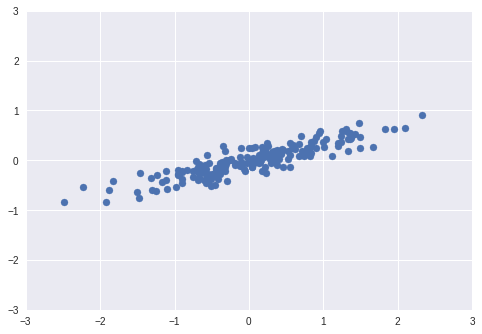

In [142]:
# get some 2-dimensional dataset
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# plot it
ax = plt.gca()
ax.scatter(x[:, 0], x[:, 1])
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))

In [143]:
# PCA preprocessing

# zero mean
mean = np.mean(x, axis=0)
x -= mean

# unit variance
np.std(x, axis=0)
x /= var

(-3, 3)

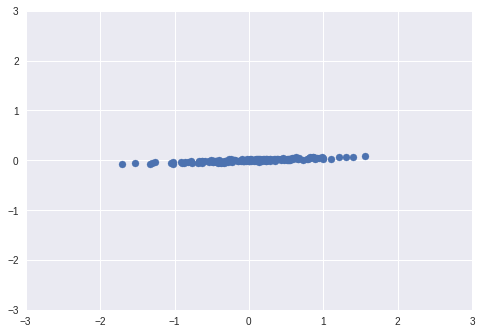

In [144]:
ax = plt.gca()
ax.scatter(x[:,0], x[:,1])
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))

[(31.347698715048775, array([ 0.99879796, -0.0490167 ])), (0.019825829193760983, array([ 0.0490167 ,  0.99879796]))]


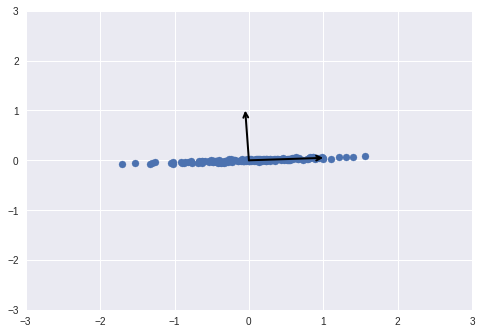

In [145]:
# compute the covariance matrix
cov = np.zeros((x.shape[1], x.shape[1]))

norm = 1./x.shape[1]

for i in range(x.shape[0]):
    cov += norm * np.dot(np.matrix(x[i]).T, np.matrix(x[i]))


# get eigendecomposition
eigenvals, eigenvecs = np.linalg.eig(cov)

print(list(zip(eigenvals, eigenvecs)))

ax = plt.gca()
ax.scatter(x[:,0], x[:,1])
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))

# plot eigenvecs
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)
ax.annotate('', eigenvecs[:,0], [0., 0.], arrowprops=arrowprops)
ax.annotate('', eigenvecs[:,1], [0., 0.], arrowprops=arrowprops)


In [146]:
ppal_eigenvec = eigenvecs[:,0]
ppal_eigenval = eigenvals[0]

# transform dataset
x_transformed = np.zeros((x.shape[0],))

for i in range(x.shape[0]):
    x_transformed[i] = np.dot(ppal_eigenvec, x[i,:])

print(ppal_eigenval, ppal_eigenvec)
x_transformed

31.347698715 [ 0.99879796  0.0490167 ]


array([ -4.47443079e-01,   6.31452628e-01,  -4.30423150e-01,
        -1.53578138e+00,  -3.37931118e-01,  -6.74104540e-01,
        -4.80645383e-01,   8.64889282e-01,   2.30748890e-01,
        -1.26278968e+00,   4.31973170e-01,  -4.18560341e-01,
        -3.07972321e-01,   9.53256348e-02,   2.33875294e-01,
        -4.83931173e-01,   6.78650841e-01,   2.05308670e-01,
         4.58117236e-01,   5.47181210e-01,   9.95704868e-01,
         1.72951726e-01,  -3.65441836e-01,   9.83701560e-01,
        -3.24764454e-01,  -3.84652390e-01,  -4.41493677e-01,
         2.76200222e-02,  -9.93866443e-02,  -3.60133383e-02,
         1.06791251e-01,   6.16145501e-01,  -2.71478724e-01,
        -6.30264997e-01,  -9.17688289e-01,  -2.82513182e-01,
        -3.73462985e-01,   5.91192990e-01,  -3.20961470e-01,
        -4.25971938e-01,  -2.34863362e-01,  -2.28274517e-01,
        -4.30209552e-01,   1.27683350e-01,   3.34237834e-01,
         3.54020101e-01,   8.98075249e-01,  -4.87750841e-01,
        -1.06810543e-01,

In [147]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=1)
x_transformed_sklearn = pca_model.fit_transform(x)

print(pca_model.explained_variance_, pca_model.components_)
x_transformed_sklearn

[ 0.31347699] [[-0.99879796 -0.0490167 ]]


array([[  4.47443079e-01],
       [ -6.31452628e-01],
       [  4.30423150e-01],
       [  1.53578138e+00],
       [  3.37931118e-01],
       [  6.74104540e-01],
       [  4.80645383e-01],
       [ -8.64889282e-01],
       [ -2.30748890e-01],
       [  1.26278968e+00],
       [ -4.31973170e-01],
       [  4.18560341e-01],
       [  3.07972321e-01],
       [ -9.53256348e-02],
       [ -2.33875294e-01],
       [  4.83931173e-01],
       [ -6.78650841e-01],
       [ -2.05308670e-01],
       [ -4.58117236e-01],
       [ -5.47181210e-01],
       [ -9.95704868e-01],
       [ -1.72951726e-01],
       [  3.65441836e-01],
       [ -9.83701560e-01],
       [  3.24764454e-01],
       [  3.84652390e-01],
       [  4.41493677e-01],
       [ -2.76200222e-02],
       [  9.93866443e-02],
       [  3.60133383e-02],
       [ -1.06791251e-01],
       [ -6.16145501e-01],
       [  2.71478724e-01],
       [  6.30264997e-01],
       [  9.17688289e-01],
       [  2.82513182e-01],
       [  3.73462985e-01],
 